In [15]:
# Settings
filename    = '/home/axel/ownCloud/documents/Masterarbeit/TPC/rawdata/LED_test_100Hz_1.4V_5120ns_trigger_2560ns_delayed_512samps_20150729.hdf5'
filename2    = '/home/axel/ownCloud/documents/Masterarbeit/TPC/rawdata/LED_test_100Hz_1.4V_500ns_LED_off_bg_512samps_20150729.hdf5'
file_format = 'hfd5'
loglevel    = 'DEBUG'

In [2]:
# Import modules
# We get a log file
#import logging
#log = logging.getLogger('XAMS_analysis')
#log.setLevel(loglevel)
# Notebookloader is needed to import ipython notebooks as python modules.
# Notebookloader prompts a warning, but it seems to work fine
# TODO Perhaps we need to reconsider what functions we actually need and put them in a regular python script?
import NotebookLoader
import Function_definitions as fn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#%matplotlib inline
plt.rc('font', size=16)
import h5py
import units
import math
from recarray_tools import append_fields
import pandas as pd

importing IPython notebook from Function_definitions.ipynb


/home/axel/anaconda3/lib/python3.4/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)


In [25]:
f = h5py.File(filename)
events = f.get('Event')[:]
peaks = f.get('Peak')[:]
pulses = f.get('Pulse')[:]
hits = f.get("Hit")[:]
f.close()
f = h5py.File(filename2)
hits2 = f.get("Hit")[:]
events2 = f.get("Event")[:]
f.close()
#hits = hits[(hits["center"]>3000)]

In [12]:
hits_by_channel = fn.group_by(hits, "channel")

/home/axel/anaconda3/lib/python3.4/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


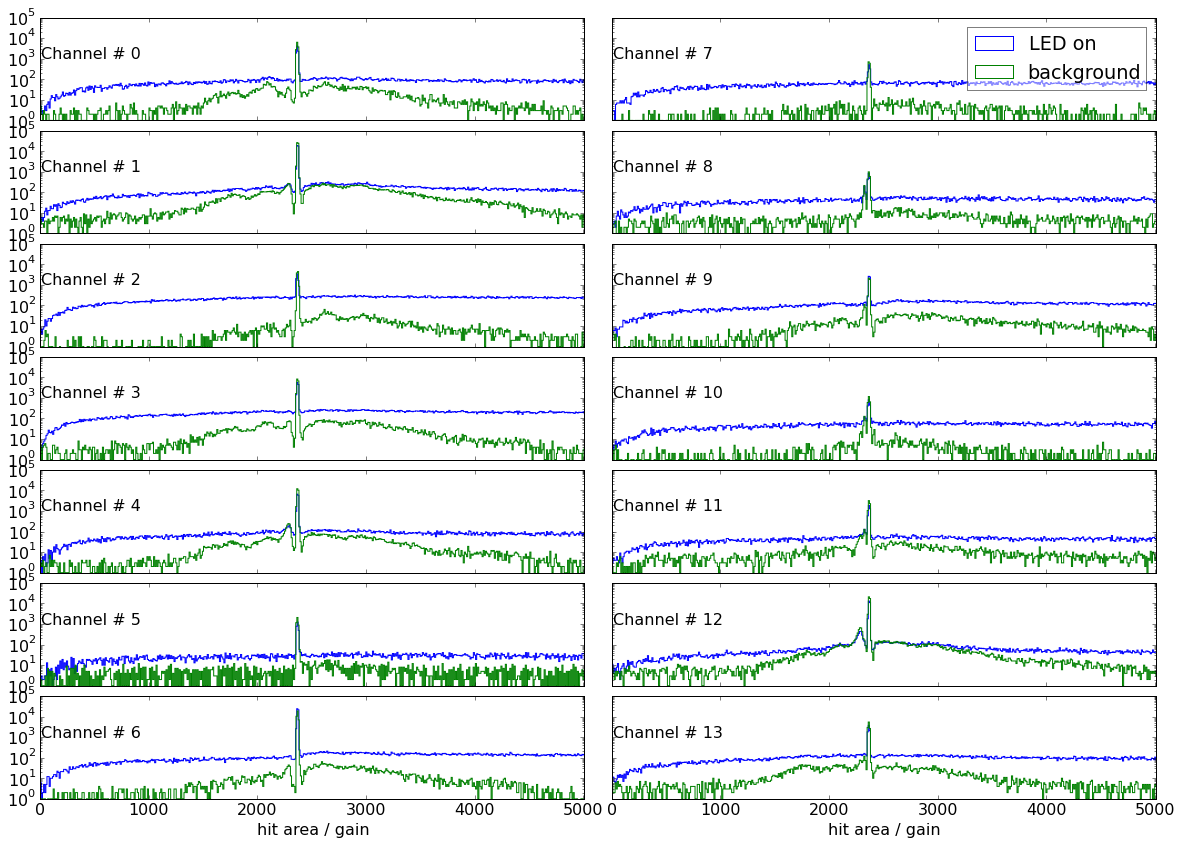

In [31]:
fig, ax = plt.subplots(nrows=7, ncols=2, sharex= True, sharey = True, squeeze=False,figsize=(20,14))
plt.subplots_adjust(hspace=0.1, wspace = 0.05)
ax[6][0].set_xlabel(r"hit area / gain")
ax[6][1].set_xlabel(r"hit area / gain")
nof_bins = 500
for xi in range(7):
        ax[xi][0].set_xlim(-1,5000)
        ax[xi][0].set_yscale("log")
        #ax[xi][yi].set_ylim(0,10000)
        ax[xi][0].hist([xhits["center"] for xhits in hits if (xhits["channel"] == xi)],
                            #range=(0,10),
                            bins=nof_bins,
                            histtype="step",
                            label= "LED on")
        ax[xi][0].hist([xhits["center"] for xhits in hits2 if (xhits["channel"] == xi)],
                            #range=(0,10),
                            bins=nof_bins,
                            histtype="step",
                            label= "background")
        ax[xi][0].text(8,1000,"Channel # %i"%xi)
for xi in range(7,14):
        ax[xi-7][1].set_xlim(-1,5010)
        ax[xi-7][1].set_yscale("log")
        #ax[xi][yi].set_ylim(0,10000)
        ax[xi-7][1].hist([xhits["center"] for xhits in hits if (xhits["channel"] == xi)],
                            #range=(0,10),
                            bins=nof_bins,
                            histtype="step",
                            label= "LED on")
        ax[xi-7][1].hist([xhits["center"] for xhits in hits2 if (xhits["channel"] == xi)],
                            #range=(0,10),
                            bins=nof_bins,
                            histtype="step",
                            label = "background")
        ax[xi-7][1].text(8,1000,"Channel # %i"%(xi))
        ax[0][1].legend(framealpha=0.5)
#fig.legend()
fig.show()
#fig.savefig("GainCalibration.pdf")

In [6]:
x = [1,2,3,4,5,6,7,8,9,10]
y = [z for z in x if z%2 ==0]
y

[2, 4, 6, 8, 10]

In [7]:
df = pd.DataFrame(pulses)

In [8]:
#df.baseline

In [30]:
plt.Axes.legend?

In [26]:
len(events)

147650

In [27]:
len(events2)

200951